# Разведочный анализ данных. Исследование и визуализация данных.

## 1) Текстовое описание набора данных

В качестве набора данных мы будем использовать набор данных 
по обнаружению присутствия людей в помещении - https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

Эта задача является очень актуальной для создания "умных зданий", 
которые выполняют все требования по кондиционированию воздуха, 
температурным условиям, но при этом экономят электроэнергию в том случае,
если людей в помещении нет.

Датасет состоит из трех файлов:
- datatraining.txt - обучающая выборка (в этом примере используется только данный файл)
- datatest.txt - тестовая выборка
- datatest2.txt - тестовая выборка большего размера

Каждый файл содержит следующие колонки:
- date - дата-время в формате ГОД-МЕСЯЦ-ДЕНЬ ЧАСЫ:МИНУТЫ:СЕКУНДЫ. Набор данных содержит данные с интервалом измерения в минуту.
- Temperature - температура в градусах Цельсия.
- Humidity - относительная влажность в %.
- Light - освещенность в Люксах.
- CO2 - концентрация углекислого газа в миллионных долях.
- HumidityRatio - величина, производная от температуры и относительной влажности.
- Occupancy - целевой признак. Если в помещении находятся люди то 1, иначе 0.

# Импорт библиотек
Импортируем библиотеки с помощью команды import. Как правило, все команды import размещают в первой ячейке ноутбука, но мы в этом примере будем подключать все библиотеки последовательно, по мере их использования.

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Загрузка данных

Загрузим файлы датасета в помощью библиотеки Pandas. 

Не смотря на то, что файлы имеют расширение txt они представляют собой данные в формате CSV (https://ru.wikipedia.org/wiki/CSV). Часто в файлах такого формата в качестве разделителей используются символы ",", ";" или табуляция. Поэтому вызывая метод read_csv всегда стоит явно указывать разделитель данных с помощью параметра sep. Чтобы узнать какой разделитель используется в файле его рекомендуется предварительно посмотреть в любом текстовом редакторе.

In [67]:
# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('MVPs_stats.csv', sep=",")

# 2) Основные характеристики датасета

In [10]:
# Первые 5 строк датасета
data.head()

,Player,Season,Age,height,weight,wingspan,Rk,G,PF,Tm,...,DRB,TRB,AST,STL,BLK,TOV,PF.1,PTS,+/-,Unnamed: 32
0,Shaquille O'Neal,1999-2000,27-241,216.0,147.0,2.31,1,1,0.0,LAL,...,8,13,1,1,2,2,4,23,16,NaN
1,Shaquille O'Neal,1999-2000,27-242,216.0,147.0,2.31,2,2,0.0,LAL,...,6,10,4,0,3,1,3,28,17,NaN
2,Shaquille O'Neal,1999-2000,27-245,216.0,147.0,2.31,3,3,0.0,LAL,...,6,10,0,0,2,2,0,21,-5,NaN
3,Shaquille O'Neal,1999-2000,27-246,216.0,147.0,2.31,4,4,0.0,LAL,...,15,20,1,1,1,2,5,30,17,NaN
4,Shaquille O'Neal,1999-2000,27-248,216.0,147.0,2.31,5,5,0.0,LAL,...,6,10,2,0,3,7,5,27,19,NaN


In [11]:
# Размер датасета - 8143 строк, 7 колонок
data.shape

(2318, 33)

In [12]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 2318


In [13]:
# Список колонок
data.columns

Index(['Player', 'Season', 'Age', 'height', 'weight', 'wingspan', 'Rk', 'G',
       'PF', 'Tm', 'Opp', 'WL', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF.1', 'PTS', '+/-', 'Unnamed: 32'],
      dtype='object')

In [58]:
# Список колонок с типами данных
data['PTS'].astype(float)
data.dtypes


Player          object
Season          object
Age             object
height         float64
weight         float64
wingspan       float64
Rk              object
G               object
PF             float64
Tm              object
Opp             object
WL              object
MP              object
FG              object
FGA             object
FG%            float64
3P              object
3PA             object
3P%             object
FT              object
FTA             object
FT%             object
ORB             object
DRB             object
TRB             object
AST             object
STL             object
BLK             object
TOV             object
PF.1            object
PTS             object
+/-            float64
Unnamed: 32     object
dtype: object

In [70]:
data = data.drop(data[data['FG%'] == 'Player Suspended'].index)
data = data.drop(data[data['FG%'] == 'Did Not Dress'].index)
data = data.drop(data[data['FG%'] == 'Did Not Play'].index)
data = data.drop(data[data['FG%'] == 'Not With Team'].index)
data = data.drop(data[data['FG%'] == 'Inactive'].index)
data = data.drop(data[data['FG%'] == 'FG%'].index)
data['FG%'] = data['FG%'].astype(float)

In [ ]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

In [ ]:
# Основные статистические характеристки набора данных
data.describe()

In [ ]:
# Определим уникальные значения для целевого признака
data['Player'].unique()

Целевой признак является бинарным и содержит только значения 0 и 1.

# 3) Визуальное исследование датасета
Для визуального исследования могут быть использованы различные виды диаграмм, мы построим только некоторые варианты диаграмм, которые используются достаточно часто.

### [Диаграмма рассеяния](https://en.wikipedia.org/wiki/Scatter_plot)

Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='wingspan', y='weight', data=data)
ax.set_xlim(150, 250)

Можно видеть что между полями Humidity и HumidityRatio пристутствует почти линейная зависимость.

Посмотрим насколько на эту зависимость влияет целевой признак.

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='wingspan', y='weight', data=data, hue='height')
ax.set_xlim(150, 250)

## [Гистограмма](https://en.wikipedia.org/wiki/Histogram) 
Позволяет оценить плотность вероятности распределения данных.

C:\Users\vdzit\AppData\Local\Temp\ipykernel_29980\3251102722.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['FG%'])


<Axes: xlabel='FG%', ylabel='Density'>

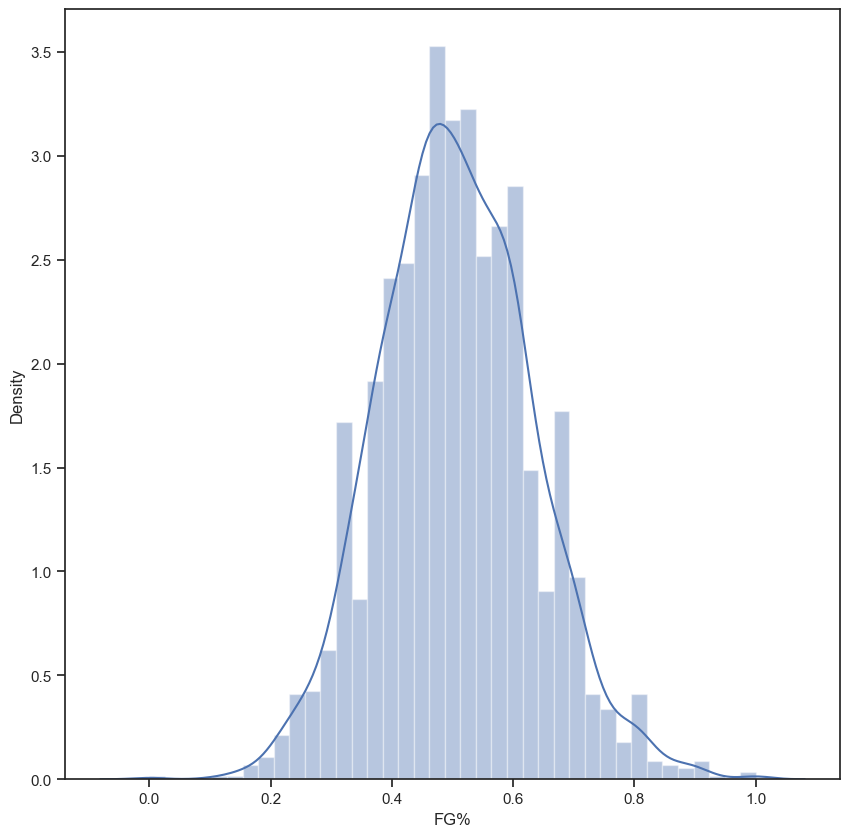

In [21]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['FG%'])

### Jointplot
Комбинация гистограмм и диаграмм рассеивания.

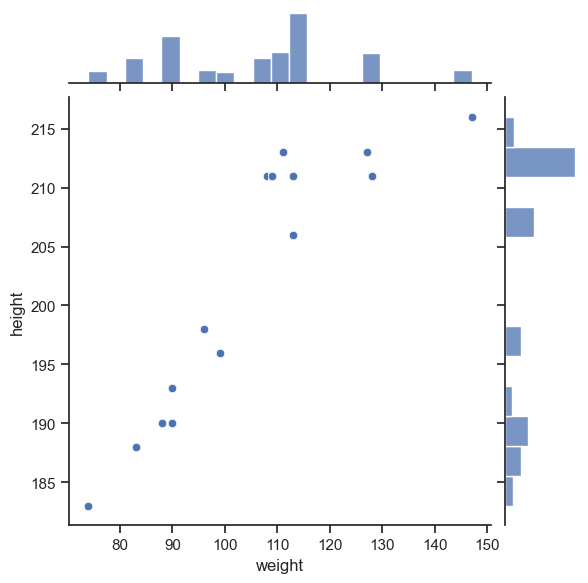

In [23]:
sns.jointplot(x='weight', y='height', data=data)

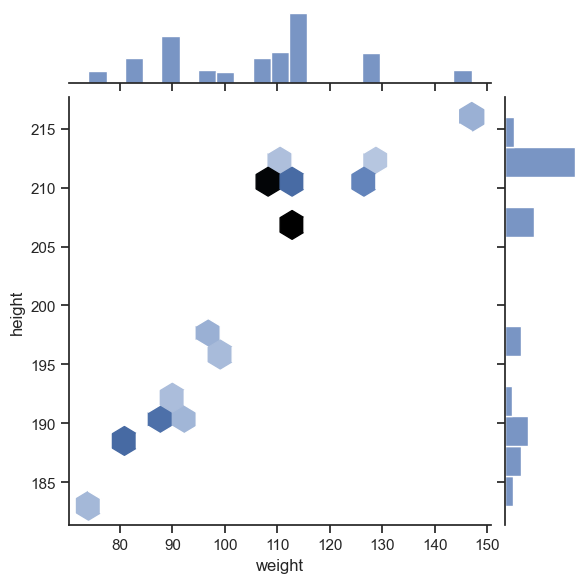

In [24]:
sns.jointplot(x='weight', y='height', data=data, kind="hex")

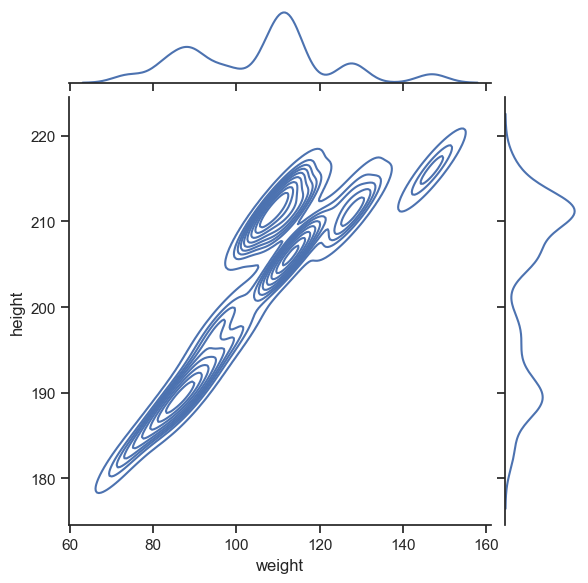

In [25]:
sns.jointplot(x='weight', y='height', data=data, kind="kde")

### "Парные диаграммы"
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

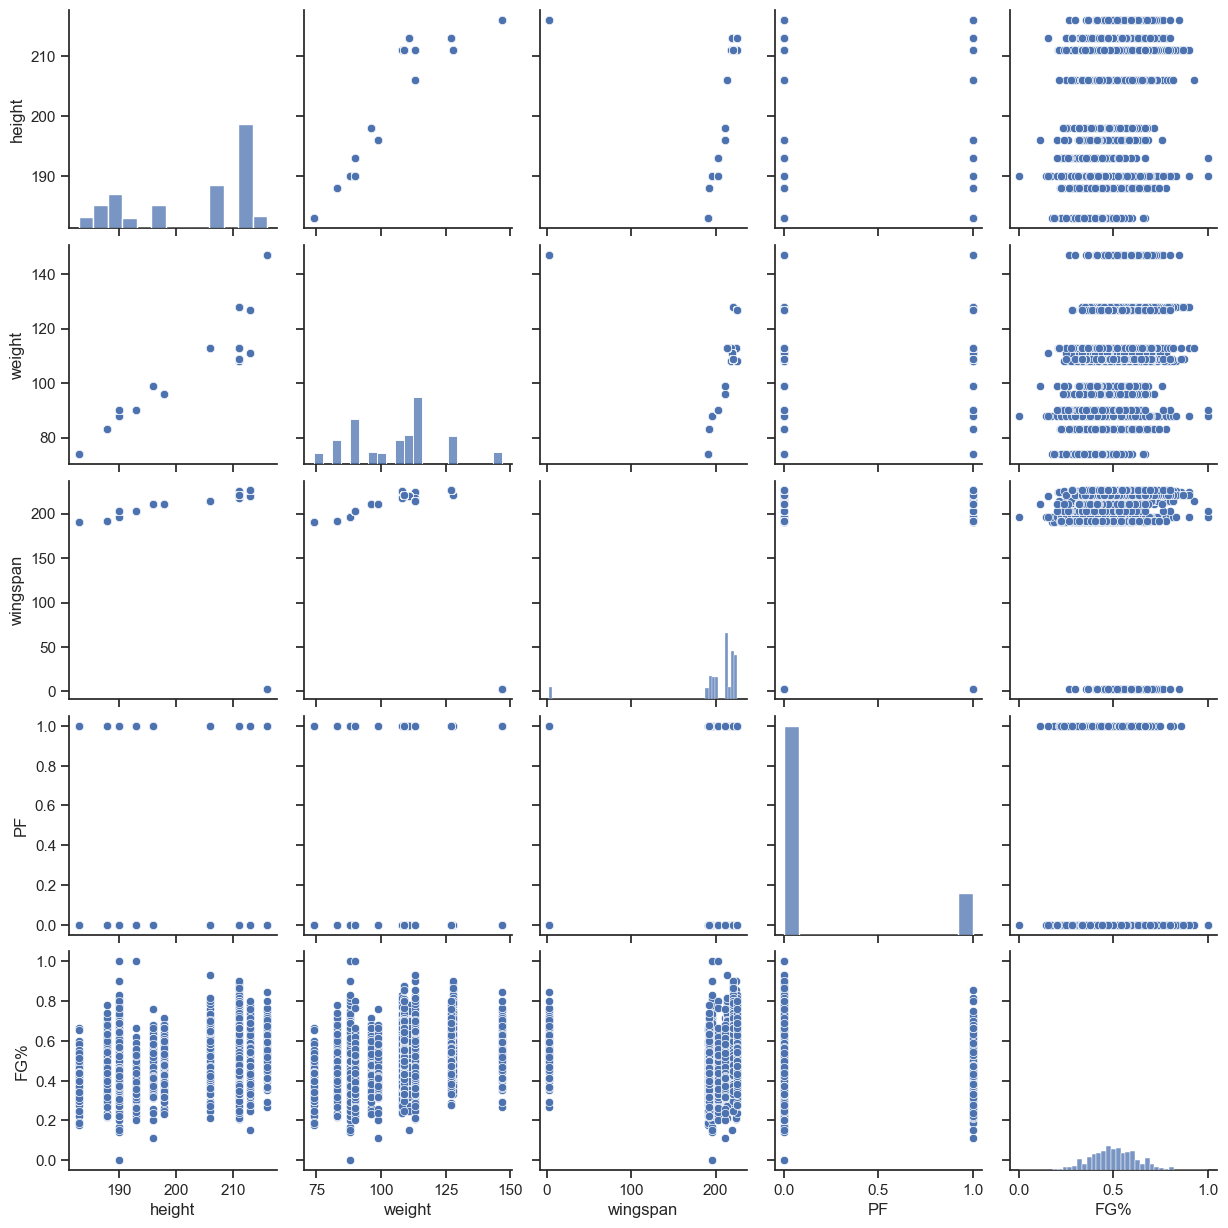

In [26]:
sns.pairplot(data)

С помощью параметра "hue" возможна группировка по значениям какого-либо признака.

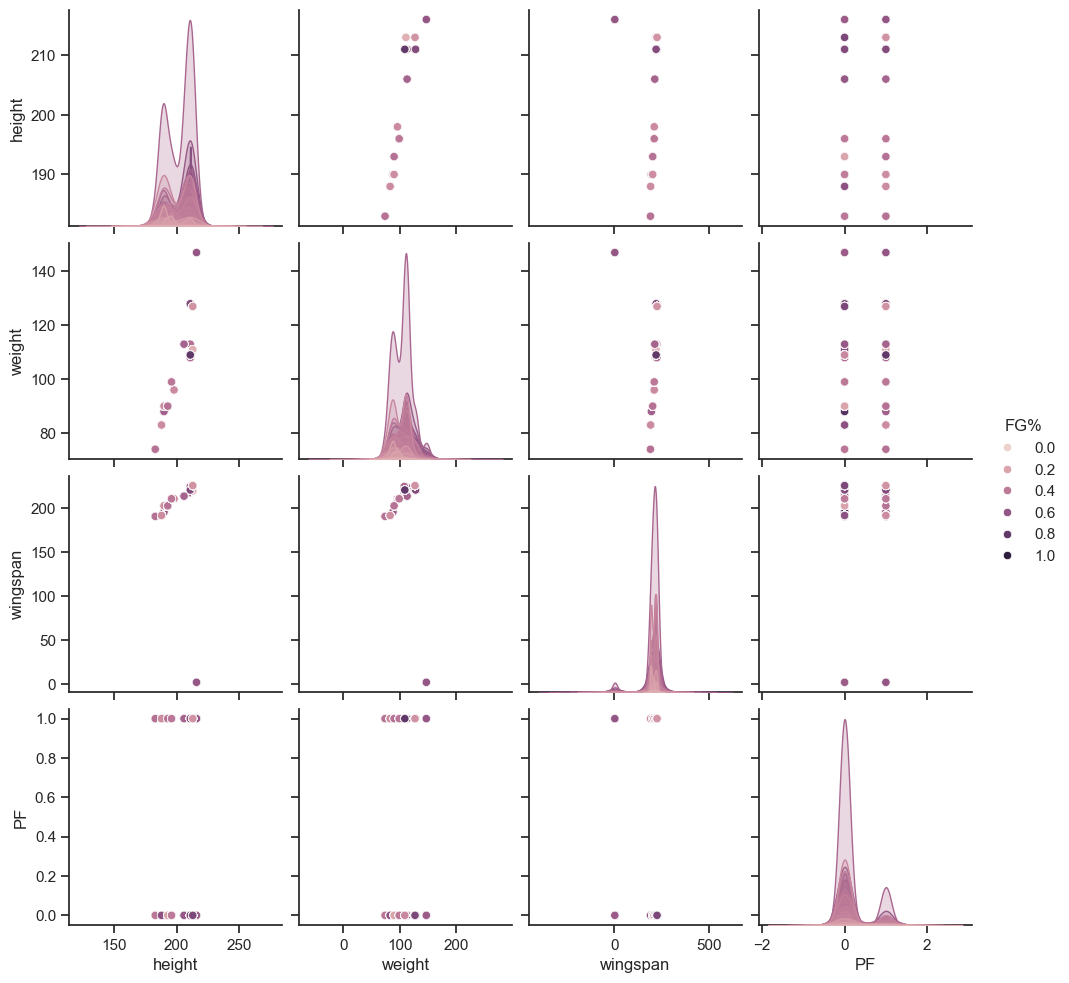

In [28]:
sns.pairplot(data, hue="FG%")

### [Ящик с усами](https://en.wikipedia.org/wiki/Box_plot)
Отображает одномерное распределение вероятности.

<Axes: xlabel='FG%'>

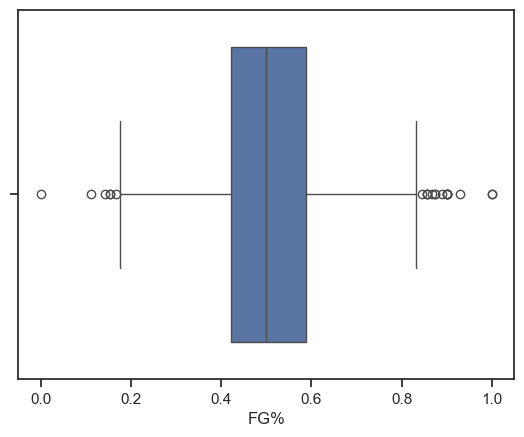

In [29]:
sns.boxplot(x=data['FG%'])

<Axes: ylabel='PTS'>

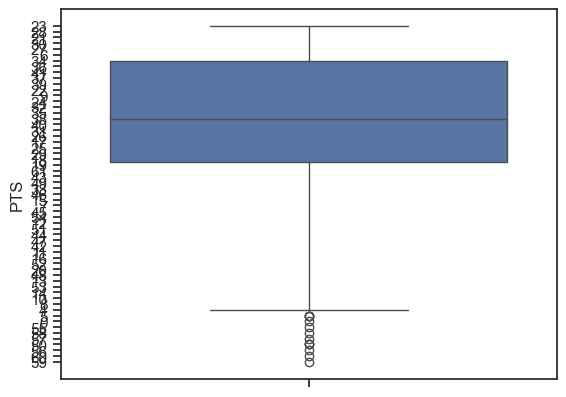

In [31]:
# По вертикали
data['PTS'].astype(float)
sns.boxplot(y=data['PTS'])

<Axes: xlabel='+/-', ylabel='+/-'>

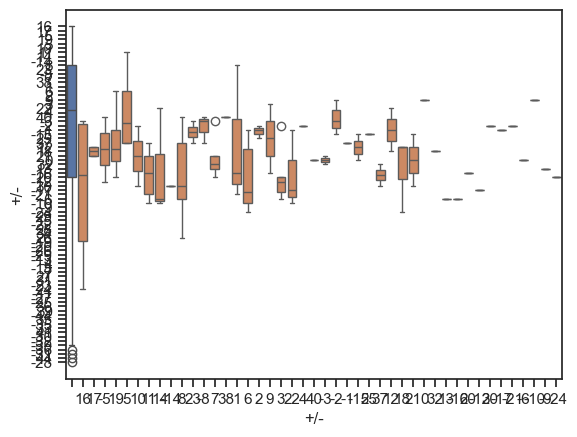

In [86]:

# Распределение параметра Humidity сгруппированные по Occupancy.
data['+/-'].astype(float)
df = data[data['Player'] == "Shaquille O'Neal"]
df = df[df['PTS'] > 0]
sns.boxplot(y=data['+/-'])
sns.boxplot(x='+/-', y='PTS', data=df)

### [Violin plot](https://en.wikipedia.org/wiki/Violin_plot)
Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности - https://en.wikipedia.org/wiki/Kernel_density_estimation

<Axes: xlabel='PTS'>

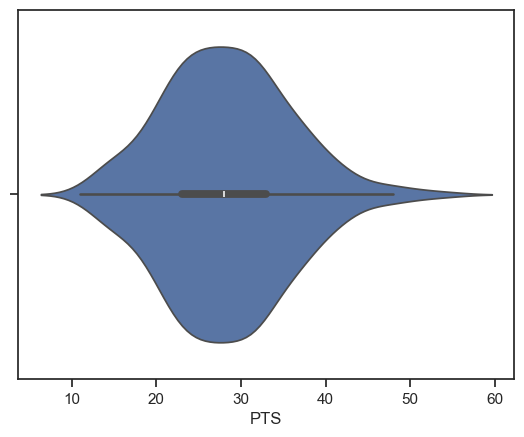

In [89]:
df = data[data['Player'] == "LeBron James"]
sns.violinplot(x=df['PTS']) 

C:\Users\vdzit\AppData\Local\Temp\ipykernel_29980\3717321257.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PTS'], ax=ax[1])


<Axes: xlabel='PTS', ylabel='Density'>

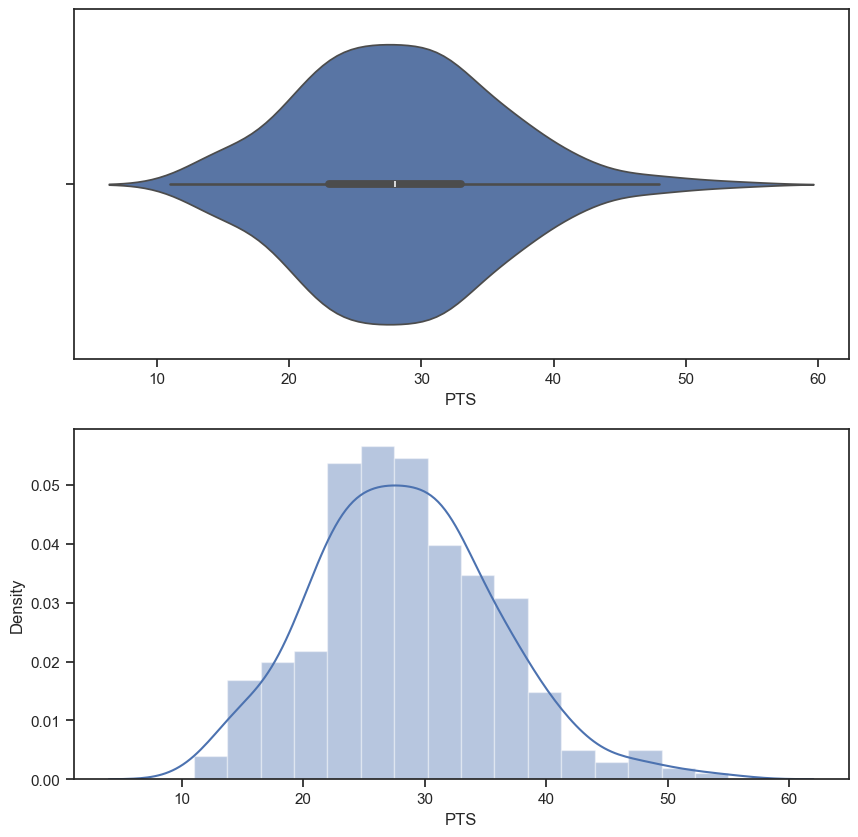

In [91]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=df['PTS'])
sns.distplot(df['PTS'], ax=ax[1])

Из приведенных графиков видно, что violinplot действительно показывает распределение плотности.

<Axes: xlabel='weight', ylabel='FG%'>

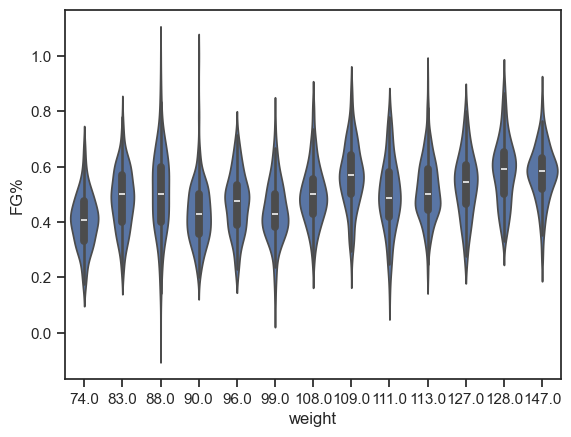

In [98]:
# Распределение параметра Humidity сгруппированные по Occupancy.
sns.violinplot(x='weight', y='FG%', data=data)

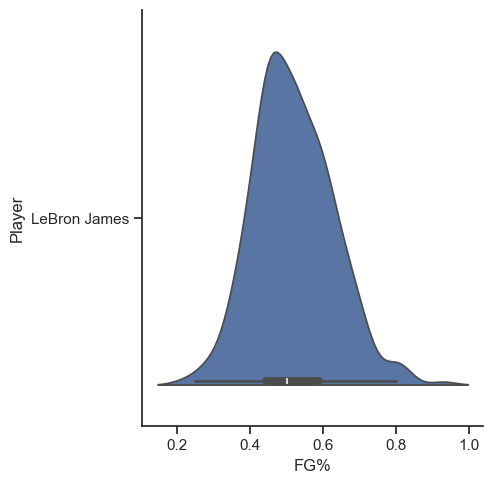

In [95]:
sns.catplot(y='Player', x='FG%', data=df, kind="violin", split=True)

# 4) Информация о корреляции признаков

Проверка корреляции признаков позволяет решить две задачи:
1. Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "Occupancy"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
1. Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [76]:
data['PTS'] = data['PTS'].astype(float)

df = data.select_dtypes(include='float64')
df.corr()

,height,weight,wingspan,PF,FG%,PTS
height,1.000000,0.902336,-0.053406,-0.032394,0.272027,0.075993
weight,0.902336,1.000000,-0.334923,-0.021326,0.289604,0.091192
wingspan,-0.053406,-0.334923,1.000000,-0.049237,-0.064570,-0.047223
PF,-0.032394,-0.021326,-0.049237,1.000000,-0.108923,0.028431
FG%,0.272027,0.289604,-0.064570,-0.108923,1.000000,0.348451
PTS,0.075993,0.091192,-0.047223,0.028431,0.348451,1.000000


Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).


На основе корреляционной матрицы можно сделать следующие выводы:
- Целевой признак наиболее сильно коррелирует с освещенностью (0.9) и концентрацией углекислого газа (0.71). Эти признаки обязательно следует оставить в модели.
- Целевой признак отчасти коррелирует с температурой (0.54). Этот признак стоит также оставить в модели.
- Целевой признак слабо коррелирует с влажностью (0.13) и HumidityRatio (0.3). Скорее всего эти признаки стоит исключить из модели, возможно они только ухудшат качество модели.
- Влажность и HumidityRatio очень сильно коррелируют между собой (0.96). Это неудивительно, ведь HumidityRatio величина производная от влажности. Поэтому из этих признаков в модели можно оставлять только один. 
- Также можно сделать вывод, что выбирая из признаков влажность и HumidityRatio лучше выбрать HumidityRatio, потому что он сильнее коррелирован с целевым признаком. Если линейно зависимые признаки сильно коррелированы с целевым, то оставляют именно тот признак, который коррелирован с целевым сильнее. Но для этой пары признаков этот вывод нельзя считать надежным, потому что и 0.13 и 0.3 являются довольно малыми величинами. 

Описание метода corr - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

По умолчанию при построении матрицы используется коэффициент корреляции [Пирсона](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F). Возможно также построить корреляционную матрицу на основе коэффициентов корреляции Кендалла и Спирмена. На практике три метода редко дают значимые различия.

In [77]:
df.corr(method='pearson')

,height,weight,wingspan,PF,FG%,PTS
height,1.000000,0.902336,-0.053406,-0.032394,0.272027,0.075993
weight,0.902336,1.000000,-0.334923,-0.021326,0.289604,0.091192
wingspan,-0.053406,-0.334923,1.000000,-0.049237,-0.064570,-0.047223
PF,-0.032394,-0.021326,-0.049237,1.000000,-0.108923,0.028431
FG%,0.272027,0.289604,-0.064570,-0.108923,1.000000,0.348451
PTS,0.075993,0.091192,-0.047223,0.028431,0.348451,1.000000


In [78]:
df.corr(method='kendall')

,height,weight,wingspan,PF,FG%,PTS
height,1.000000,0.722413,0.692431,-0.036534,0.192977,0.057363
weight,0.722413,1.000000,0.514190,-0.023525,0.201001,0.071178
wingspan,0.692431,0.514190,1.000000,-0.048894,0.114775,0.038537
PF,-0.036534,-0.023525,-0.048894,1.000000,-0.087164,0.024165
FG%,0.192977,0.201001,0.114775,-0.087164,1.000000,0.253025
PTS,0.057363,0.071178,0.038537,0.024165,0.253025,1.000000


In [79]:
df.corr(method='spearman')

,height,weight,wingspan,PF,FG%,PTS
height,1.000000,0.824771,0.680941,-0.041344,0.263224,0.078952
weight,0.824771,1.000000,0.557078,-0.027253,0.280098,0.098186
wingspan,0.680941,0.557078,1.000000,-0.057143,0.158933,0.052204
PF,-0.041344,-0.027253,-0.057143,1.000000,-0.105876,0.029120
FG%,0.263224,0.280098,0.158933,-0.105876,1.000000,0.358477
PTS,0.078952,0.098186,0.052204,0.029120,0.358477,1.000000


В случае большого количества признаков анализ числовой корреляционной матрицы становится неудобен. 

Для визуализации корреляционной матрицы будем использовать "тепловую карту" heatmap которая показывает степень корреляции различными цветами.

Используем метод heatmap библиотеки seaborn - https://seaborn.pydata.org/generated/seaborn.heatmap.html

<Axes: >

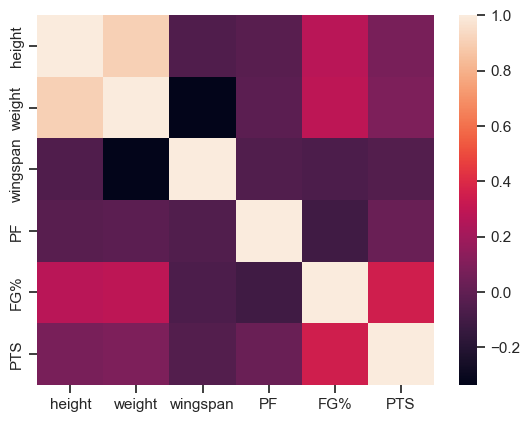

In [80]:
sns.heatmap(df.corr())

<Axes: >

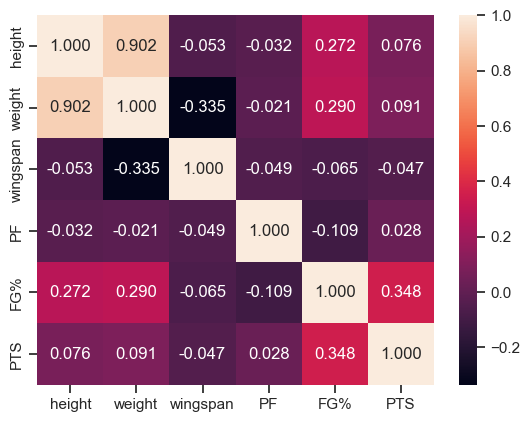

In [81]:
# Вывод значений в ячейках
sns.heatmap(df.corr(), annot=True, fmt='.3f')

<Axes: >

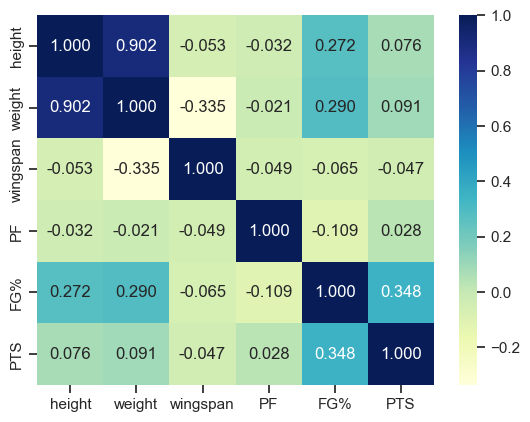

In [82]:
# Изменение цветовой гаммы
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

<Axes: >

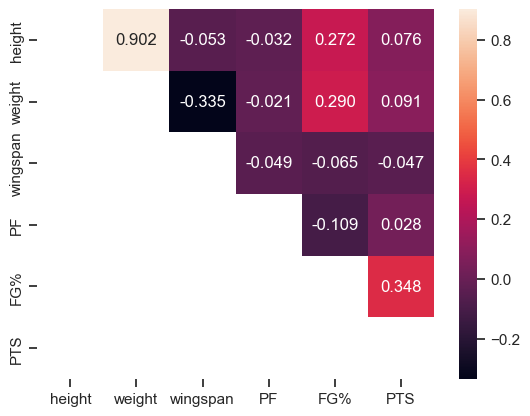

In [85]:
# Треугольный вариант матрицы
mask = np.zeros_like(df.corr(), dtype=np.float64)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(df.corr(), mask=mask, annot=True, fmt='.3f')

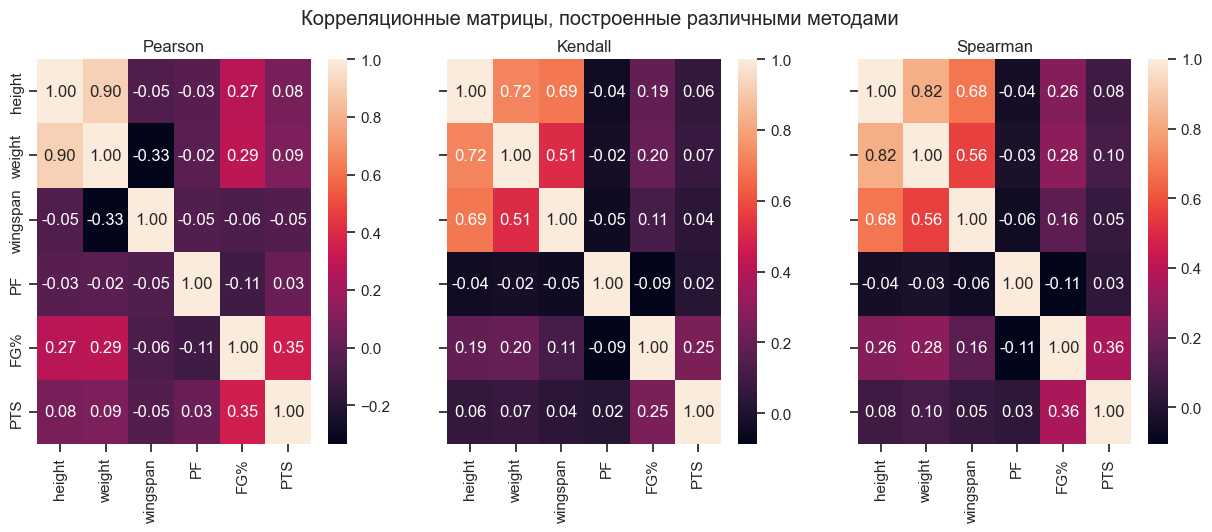

In [83]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(df.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(df.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(df.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

### Тепловая карта с указание размера

- Функция plt.subplots создает область окна нужного размера, в которую может выводиться график.
- Параметр figsize=(размер по горизонтали, размер по вертикали).
- По умолчанию размер задается в дюймах, но возможно использование и других единиц измерения - https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/figure_size_units.html
- Функция sns.heatmap содержит параметр ax=ax, который ссылается на область, созданную plt.subplots, поэтому график выводится в данной области.

<AxesSubplot:>

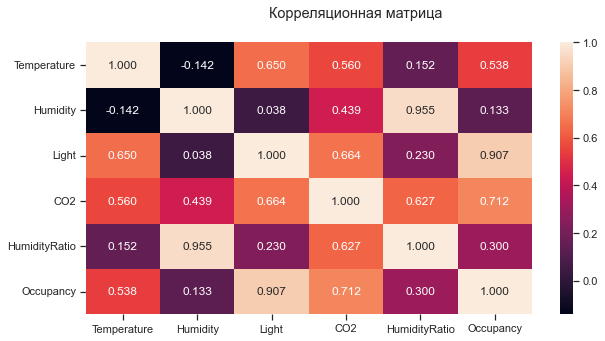

In [ ]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Корреляционная матрица')
sns.heatmap(df.corr(), ax=ax, annot=True, fmt='.3f')

Необходимо отметить, что тепловая карта не очень хорошо подходит для определения корреляции нецелевых признаков между собой.

В примере тепловая карта помогает определить значимую корреляцию между признаками Humidity и HumidityRatio, следовательно только один из этих признаков можно включать в модель.

Но в реальной модели могут быть сотни признаков и коррелирующие признаки могут образовывать группы, состояшие более чем из  двух признаков. Увидеть такие группы с помощью тепловой карты сложно.

Для решения задачи предлагается новый вариант визуализации - "Солнечная корреляционная карта" [Solar correlation map](https://github.com/Zapf-Consulting/solar-correlation-map).

К сожалению, данная библиотека пока работает только через файловый интерфейс и не предназначена для встраивания в ноутбук.

Примеры статей с описанием работы библиотеки:
- https://www.oreilly.com/learning/a-new-visualization-to-beautifully-explore-correlations
- https://www.mtab.com/the-puzzle-of-visualizing-correlations/

# Дополнительные ссылки на обучающие ноутбуки

[The Best Tutorial for Beginners (Kaggle)](https://www.kaggle.com/getting-started/71679)